# Data exploration

### Check input data

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
image_dir = "data/training/images"  
mask_dir = "data/training/groundtruth"

In [5]:
def load_image_and_mask(image_name, mask_dir):
    image_path = os.path.join(image_dir, image_name)
    mask_path = os.path.join(mask_dir, image_name)
    image = np.array(Image.open(image_path))
    mask = np.array(Image.open(mask_path))
    return image, mask

In [6]:
def check_mask_format(mask):
    unique_values = np.unique(mask)
    is_binary = set(unique_values).issubset({0, 255}) 
    return is_binary, unique_values

In [7]:
def verify_alignment(image, mask):
    return image.shape[:2] == mask.shape

In [8]:
def validate_dataset(image_dir, mask_dir, num_samples=5):
    image_files = os.listdir(image_dir)
    mask_files = os.listdir(mask_dir)

    assert len(image_files) == len(mask_files), "Mismatch in number of images and masks"
    
    sampled_files = np.random.choice(image_files, num_samples, replace=False)
    
    for image_name in sampled_files:
        print(f"Validating {image_name}...")
        image, mask = load_image_and_mask(image_name, mask_dir)
        
        # Check binary format of the mask
        is_binary, unique_values = check_mask_format(mask)
        if not is_binary:
            print(f"⚠️ Mask {image_name} is not binary! Unique values: {unique_values}")
        else:
            print(f"✔️ Mask {image_name} is binary. Unique values: {unique_values}")
        
        # Verify alignment
        aligned = verify_alignment(image, mask)
        if not aligned:
            print(f"❌ Image and mask {image_name} are not aligned!")
        else:
            print(f"✔️ Image and mask {image_name} are aligned.")

        # Sattelite image
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Satellite image")
        plt.axis('off')
        
        # Mask 
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Binary mask")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

Validating satImage_098.png...
⚠️ Mask satImage_098.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 2

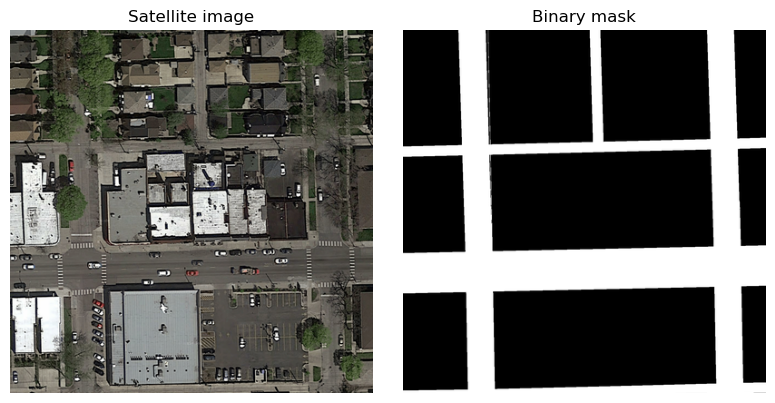

Validating satImage_058.png...
⚠️ Mask satImage_058.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  19  20  21  22  23  24  25  26  27  28  29  30  31  36  37  39  40  41
  42  43  44  45  46  47  48  49  50  51  53  54  56  57  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  75  77  78  82  83  84  85
  86  87  88  89  90  91  92  93  96  97  98 102 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 126 127 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 144 145 146 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 166 168 171 175
 176 177 178 179 180 181 182 183 184 185 186 187 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237]
✔️ Image and mask satImage_058.png are aligned.


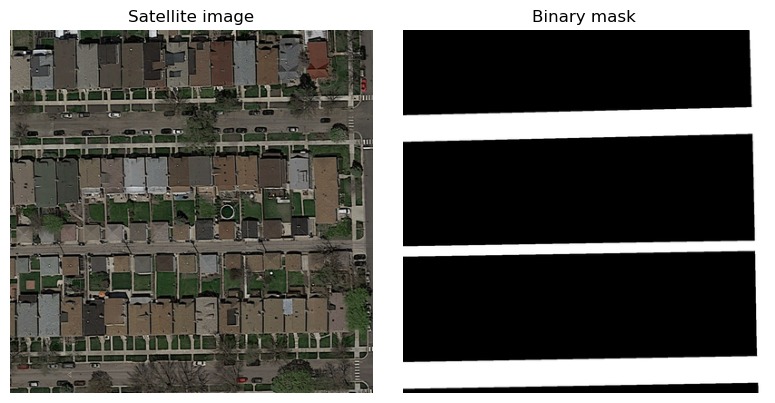

Validating satImage_079.png...
⚠️ Mask satImage_079.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 147 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 2

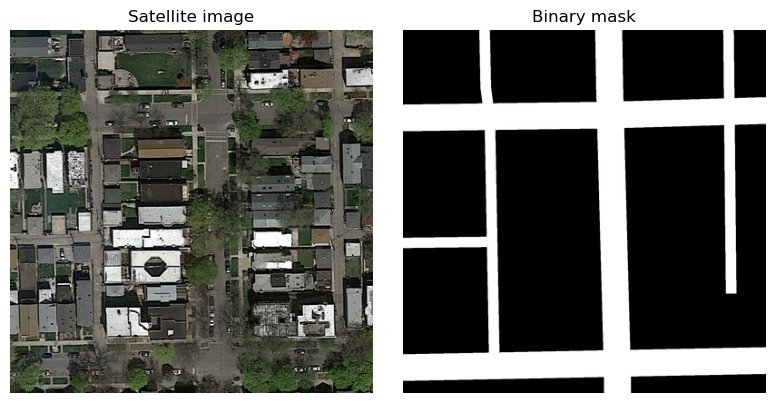

Validating satImage_050.png...
⚠️ Mask satImage_050.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  69  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237]
✔️ I

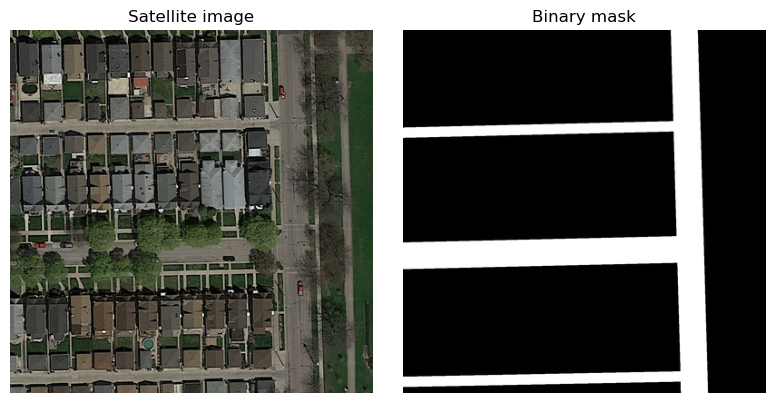

Validating satImage_078.png...
⚠️ Mask satImage_078.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 2

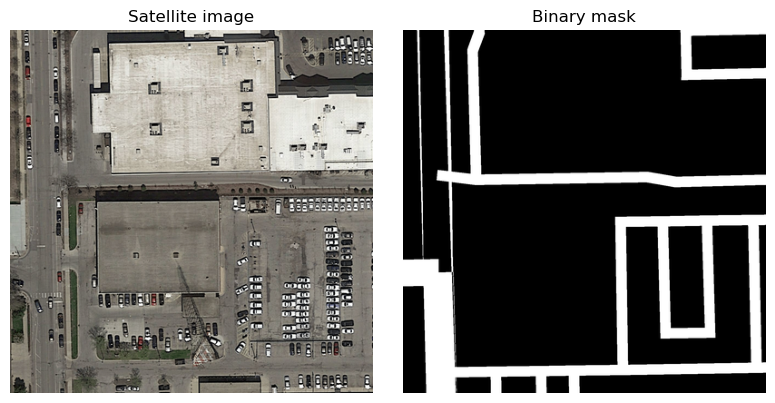

In [9]:
validate_dataset(image_dir, mask_dir, num_samples=5)

The mask contains pixels that are grey; the following function is converting any grey pixels into black or white pixels using a threshold of 128.

In [10]:
def binarize_mask(mask, threshold=128):
    """
    Converts a non-binary mask into a binary mask using a threshold.
    
    Parameters:
        mask (numpy array): Input mask.
        threshold (int): Threshold for binarization (default: 128).
        
    Returns:
        binary_mask (numpy array): Binarized mask with values 0 and 1.
    """
    if mask.max() > 1:
        mask = mask / 255.0 
    
    binary_mask = (mask > threshold / 255.0).astype(np.uint8)
    return binary_mask


def process_masks(mask_dir, output_dir, threshold=128):
    """
    Processes all masks in a directory to ensure they are binary.
    
    Parameters:
        mask_dir (str): Path to directory containing masks.
        output_dir (str): Path to directory to save processed masks.
        threshold (int): Threshold for binarization.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    mask_files = os.listdir(mask_dir)
    
    for mask_file in mask_files:
        mask_path = os.path.join(mask_dir, mask_file)
        mask = np.array(Image.open(mask_path).convert('L')) 
        
        binary_mask = binarize_mask(mask, threshold)
        
        binary_mask_image = Image.fromarray((binary_mask * 255).astype(np.uint8))
        binary_mask_image.save(os.path.join(output_dir, mask_file))

In [11]:
process_masks_dir = "data/training/groundtruth_binarize"
process_masks(mask_dir, process_masks_dir, threshold=128)

Validating satImage_025.png...
✔️ Mask satImage_025.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_025.png are aligned.


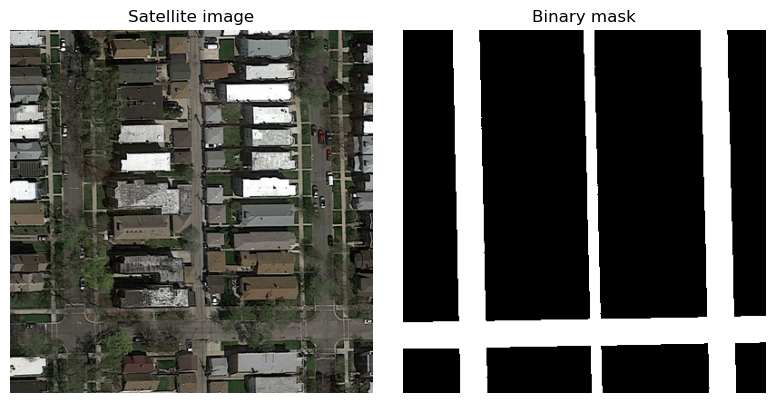

Validating satImage_035.png...
✔️ Mask satImage_035.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_035.png are aligned.


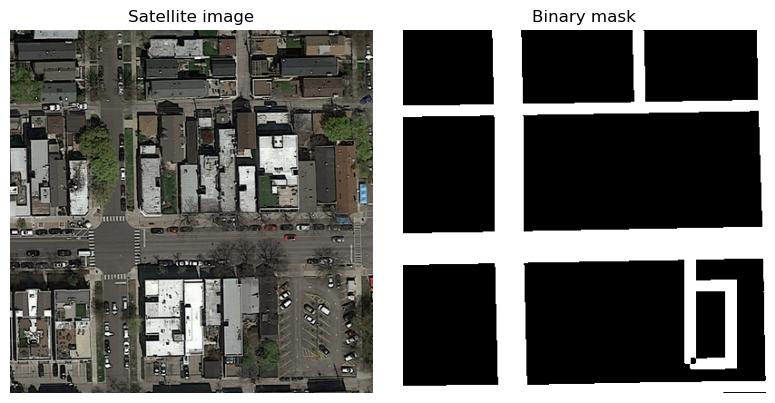

Validating satImage_054.png...
✔️ Mask satImage_054.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_054.png are aligned.


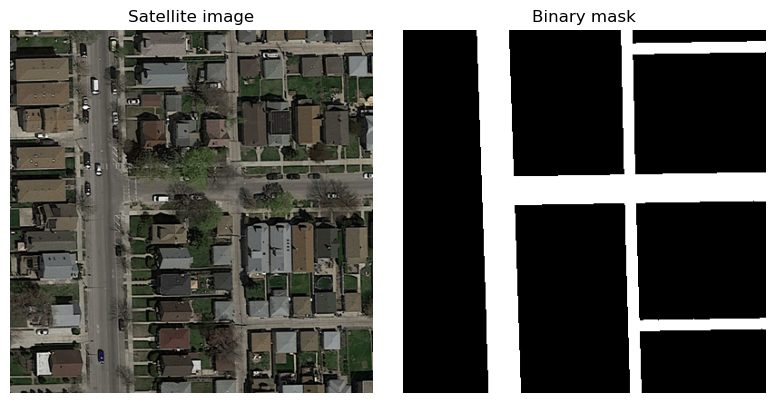

Validating satImage_082.png...
✔️ Mask satImage_082.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_082.png are aligned.


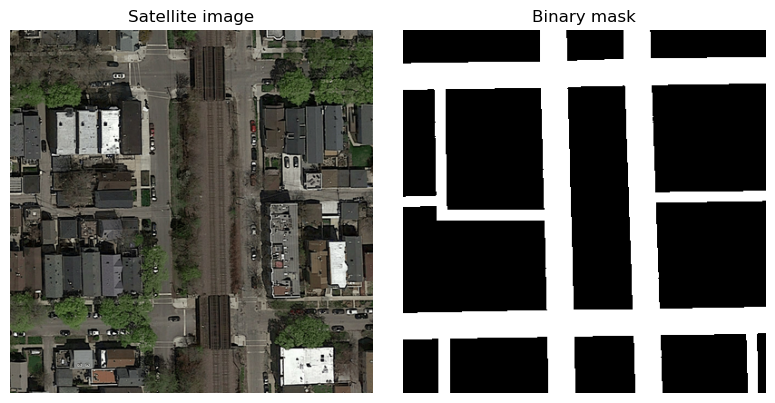

Validating satImage_071.png...
✔️ Mask satImage_071.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_071.png are aligned.


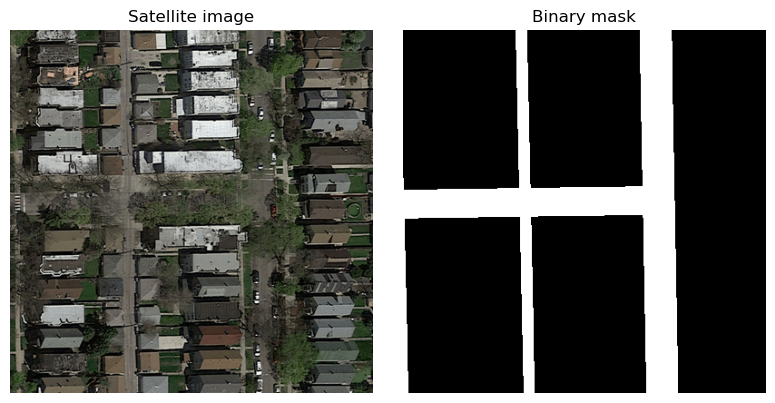

In [12]:
validate_dataset(image_dir, process_masks_dir, num_samples=5)

In [13]:
def plot_pixel_value_distribution(image_dir, num_samples=5):
    image_files = os.listdir(image_dir)
    sampled_files = np.random.choice(image_files, num_samples, replace=False)

    print("Analysis of image pixel values:")
    
    plt.figure(figsize=(12, 6))
    for image_name in sampled_files:
        image = np.array(Image.open(os.path.join(image_dir, image_name)))
        
        # BW image
        if len(image.shape) == 2:  
            plt.hist(image.ravel(), bins=256, color='gray', alpha=0.7, label='Grayscale Image')
        # RGB image
        elif len(image.shape) == 3: 
            colors = ['red', 'green', 'blue']
            for i, color in enumerate(colors):
                plt.hist(image[:, :, i].ravel(), bins=256, color=color, alpha=0.5, label=f'{color.upper()} Channel')
    
    plt.title("Pixel value distribution")
    plt.xlabel("Pixel intensity")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


def class_imbalance_analysis(mask_dir):
    mask_files = os.listdir(mask_dir)
    
    total_pixels = 0
    road_pixels = 0
    
    for mask_name in mask_files:
        mask = np.array(Image.open(os.path.join(mask_dir, mask_name)))/255
        
        # Ensure the mask is binary
        assert set(np.unique(mask)).issubset({0, 1}), f"Mask {mask_name} is not binary!"
        
        total_pixels += mask.size
        road_pixels += np.sum(mask)
    
    non_road_pixels = total_pixels - road_pixels
    road_percentage = (road_pixels / total_pixels) * 100
    non_road_percentage = (non_road_pixels / total_pixels) * 100
    
    print("Class imbalance analysis:")
    print(f"Total pixels: {total_pixels}")
    print(f"Road pixels (white): {road_pixels} ({road_percentage:.2f}%)")
    print(f"Non-road pixels (black): {non_road_pixels} ({non_road_percentage:.2f}%)")
    
    plt.figure(figsize=(6, 6))
    plt.pie([road_pixels, non_road_pixels], labels=["Road", "Non-Road"], autopct='%1.1f%%', colors=['orange', 'blue'])
    plt.title("Class distribution in masks")
    plt.show()


def analyze_dataset(image_dir, mask_dir):

    plot_pixel_value_distribution(image_dir)
    class_imbalance_analysis(mask_dir)

Analysis of image pixel values:


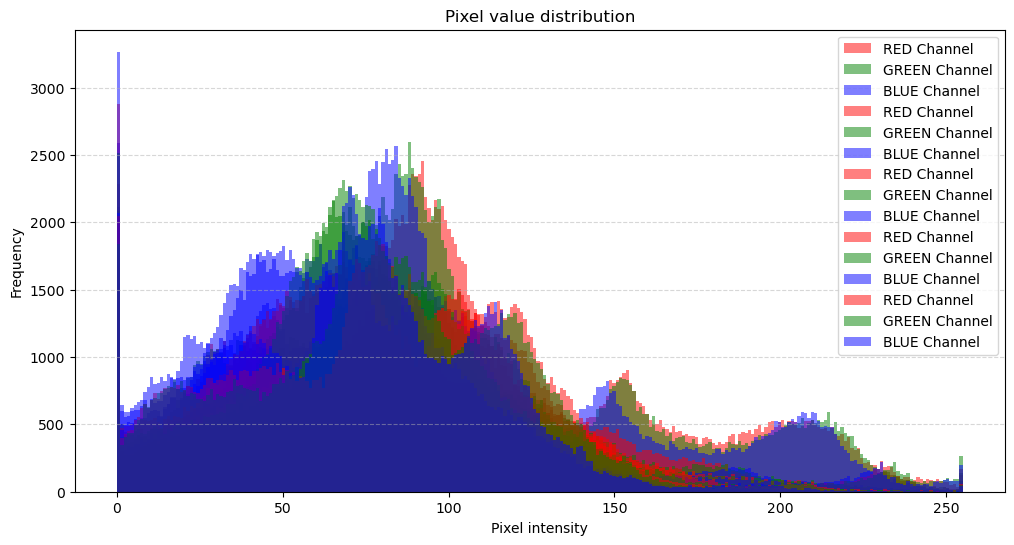

Class imbalance analysis:
Total pixels: 16000000
Road pixels (white): 3206368.0 (20.04%)
Non-road pixels (black): 12793632.0 (79.96%)


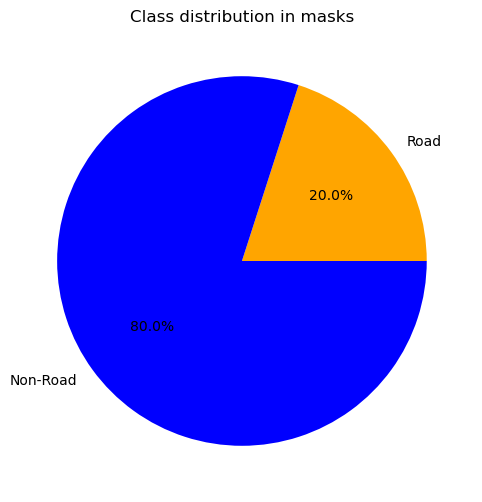

In [14]:
analyze_dataset(image_dir, process_masks_dir)

About 20% of the pixels in the images corresponds to a road. We will probably need to do class weighting.

In [15]:
def spatial_distribution_analysis(mask_dir, grid_size=(10, 10)):
    """
    Analyzes the spatial distribution of road pixels across binary masks.
    
    Parameters:
        mask_dir (str): Directory containing binary masks.
        grid_size (tuple): Size of grid for aggregation (rows, columns).
    """
    mask_files = os.listdir(mask_dir)
    
    grid_road_density = np.zeros(grid_size, dtype=np.float32)
    
    for mask_name in mask_files:
        mask = np.array(Image.open(os.path.join(mask_dir, mask_name)))/255
        
        assert set(np.unique(mask)).issubset({0, 1}), f"Mask {mask_name} is not binary!"
        
        # Divide mask into grid regions and calculate road density
        h, w = mask.shape
        grid_h, grid_w = grid_size
        cell_h, cell_w = h // grid_h, w // grid_w
        
        for i in range(grid_h):
            for j in range(grid_w):
                cell = mask[i * cell_h:(i + 1) * cell_h, j * cell_w:(j + 1) * cell_w]
                grid_road_density[i, j] += np.sum(cell)
    
    # Normalize road density by the total number of pixels per cell
    total_pixels_per_cell = (mask.shape[0] // grid_size[0]) * (mask.shape[1] // grid_size[1])
    grid_road_density /= (len(mask_files) * total_pixels_per_cell)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(grid_road_density, cmap="hot", interpolation="nearest")
    plt.colorbar(label="Average road density")
    plt.title("Spatial distribution of road pixels")
    plt.xlabel("Grid column")
    plt.ylabel("Grid row")
    plt.show()

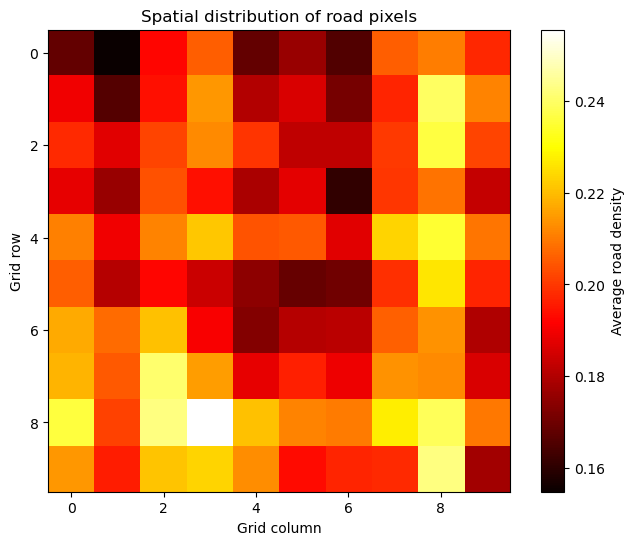

In [16]:
spatial_distribution_analysis(process_masks_dir, grid_size=(10, 10))

The pixels corresponding to a road seem to be less likely to be located in the top left corner of the satellite image. To avoid any biases, we should do data augmentation through rotations and flips.

## Data augmentation

In [17]:
import albumentations as A
from albumentations.augmentations.transforms import Normalize
from albumentations.core.composition import OneOf
from albumentations.augmentations import functional as F
from albumentations.pytorch import ToTensorV2

In [18]:
AUGMENTED_IMAGE_DIR = "data/training/augmented/images"
AUGMENTED_MASK_DIR = "data/training/augmented/masks"

os.makedirs(AUGMENTED_IMAGE_DIR, exist_ok=True)
os.makedirs(AUGMENTED_MASK_DIR, exist_ok=True)

augmentation_pipeline = A.Compose(  
    [
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),  
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.5)
    ]
)

In [21]:
def augment_and_save(image_dir, mask_dir, augmented_image_dir, augmented_mask_dir, num_augmentations=3):
    '''
    Augments the data and saves it
    '''
    image_files = os.listdir(image_dir)
    
    for image_name in image_files:
        image_path = os.path.join(image_dir, image_name)
        mask_path = os.path.join(mask_dir, image_name) 
        
        image = np.array(Image.open(image_path).convert("RGB"))
        mask = np.array(Image.open(mask_path))
        
        assert set(np.unique(mask)).issubset({0, 255}), f"Mask {image_name} is not binary!"
        
        for i in range(num_augmentations):

            augmented = augmentation_pipeline(image=image, mask=mask)
            augmented_image = augmented['image']
            augmented_mask = augmented['mask']
            
            aug_image_path = os.path.join(augmented_image_dir, f"{os.path.splitext(image_name)[0]}_aug_{i}.png")
            aug_mask_path = os.path.join(augmented_mask_dir, f"{os.path.splitext(image_name)[0]}_aug_{i}.png")
            
            Image.fromarray(augmented_image).save(aug_image_path)
            Image.fromarray(augmented_mask).save(aug_mask_path)
            
        print(f"Augmented {image_name} and saved {num_augmentations} variations.")

In [23]:
augment_and_save(image_dir, process_masks_dir, AUGMENTED_IMAGE_DIR, AUGMENTED_MASK_DIR, num_augmentations=3)

Augmented satImage_052.png and saved 3 variations.
Augmented satImage_046.png and saved 3 variations.
Augmented satImage_091.png and saved 3 variations.
Augmented satImage_085.png and saved 3 variations.
Augmented satImage_084.png and saved 3 variations.
Augmented satImage_090.png and saved 3 variations.
Augmented satImage_047.png and saved 3 variations.
Augmented satImage_053.png and saved 3 variations.
Augmented satImage_045.png and saved 3 variations.
Augmented satImage_051.png and saved 3 variations.
Augmented satImage_079.png and saved 3 variations.
Augmented satImage_086.png and saved 3 variations.
Augmented satImage_092.png and saved 3 variations.
Augmented satImage_093.png and saved 3 variations.
Augmented satImage_087.png and saved 3 variations.
Augmented satImage_078.png and saved 3 variations.
Augmented satImage_050.png and saved 3 variations.
Augmented satImage_044.png and saved 3 variations.
Augmented satImage_068.png and saved 3 variations.
Augmented satImage_040.png and 

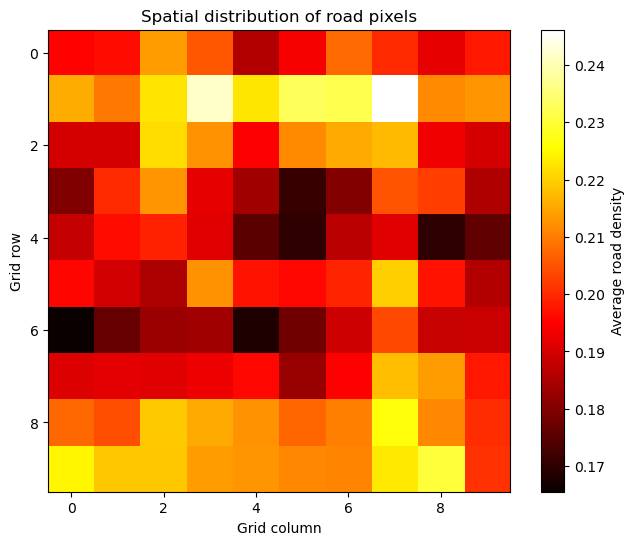

In [24]:
spatial_distribution_analysis(AUGMENTED_MASK_DIR, grid_size=(10, 10))